# Import dataset and basic analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('pima-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# vizualize the zero values using heatmap

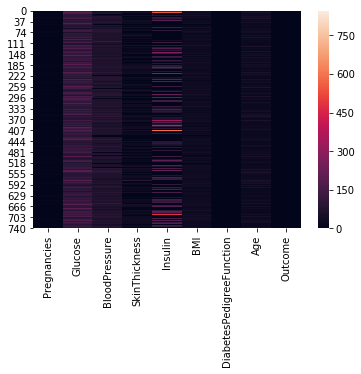

In [4]:
import seaborn as sns
sns.heatmap(df)

# replace the zero values with mean value

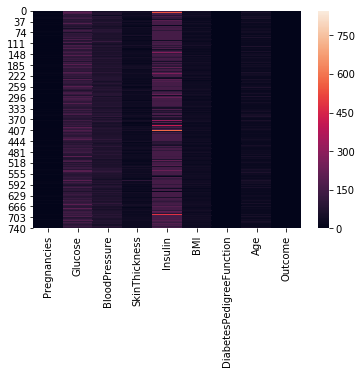

In [5]:
import numpy as np
custom_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for cols in custom_col:
    df[cols] = df[cols].replace(0,np.NaN)
    mean = int(df[cols].mean(skipna = True))
    df[cols] = df[cols].replace(np.NaN,mean)

sns.heatmap(df)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# import the scikit- train_test_split and create a model of 80/20 

In [7]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:8]
y = df.iloc[:,8]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

# feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# use svm linear model

In [9]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy,recall score,precision score confusion matrix and f1score

In [10]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_pred)

0.7987012987012987

In [11]:
metrics.recall_score(y_test,y_pred)

0.5531914893617021

In [12]:
metrics.precision_score(y_test,y_pred)

0.7222222222222222

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[97, 10],
       [21, 26]], dtype=int64)

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6265060240963856